# Alcohol Inventory Optimization Project

#This notebook provides an end-to-end solution for analyzing and optimizing alcohol inventory across multiple bars. The goal is to:
#- Track and forecast inventory
#- Identify overstock/understock conditions
#- Generate reorder plans
#- Visualize inventory trends


In [1]:
import pandas as pd


In [2]:
import os
os.listdir()


['.ai-navigator',
 '.anaconda',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.cursor',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.kaggle',
 '.keras',
 '.matplotlib',
 '.vscode',
 '3D Objects',
 'alcohol_inventory.ipynb',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'BikeDataset.ipynb',
 'Brand_Usage_Ratio_by_Bar.xlsx',
 'Contacts',
 'Cookies',
 'DeepFake.ipynb',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'london-bike-sharing-dataset.zip',
 'london_merged.csv',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{4a61c8cd-70d2-11ef-9302-d6c1475b22a1}.TM.blf',
 'NTUSER.DAT{4a61c8cd-70d2-11ef-9302-d6c1475b22a1}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{4a61c8cd-70d2-11ef-9302-d6c1475b22a1}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'output',
 'Pictures',
 'postgresql_12.exe',
 'Pri

In [5]:
import pandas as pd

df = pd.read_excel("C:\\Users\\anush\\Downloads\\Consumption Dataset.xlsx", sheet_name="Dataset")
df.head()


,Time,Date,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Unnamed: 9,Unnamed: 10
0,19:35:00,2023-01-01,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.0,4379.88,NaN,
1,20:35:00,2023-01-02,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.0,1344.37,NaN,NaN
2,21:35:00,2023-01-03,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.0,1034.28,NaN,NaN
3,22:35:00,2023-01-04,Johnson's Bar,Beer,Coors,2194.53,0.00,0.0,2194.53,NaN,NaN
4,23:35:00,2023-01-05,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.0,1020.90,NaN,NaN


In [6]:
df_cleaned = df.dropna()



In [8]:
df.describe()

,Date,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
count,6575,6575.000000,6575.000000,6575.000000,6575.000000
mean,2031-12-31 23:59:59.999999744,2468.393518,315.841757,299.419264,2484.816011
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2027-07-02 12:00:00,619.135000,0.000000,156.640000,611.000000
50%,2032-01-01 00:00:00,1848.440000,0.000000,300.390000,1849.840000
75%,2036-07-01 12:00:00,3853.020000,526.345000,450.870000,3906.050000
max,2040-12-31 00:00:00,11862.520000,1999.840000,1180.580000,11862.520000
std,NaN,2284.556232,582.120264,191.903874,2302.362117


In [9]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [10]:
df.describe()

,Date,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
count,6575,6575.000000,6575.000000,6575.000000,6575.000000
mean,2031-12-31 23:59:59.999999744,2468.393518,315.841757,299.419264,2484.816011
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2027-07-02 12:00:00,619.135000,0.000000,156.640000,611.000000
50%,2032-01-01 00:00:00,1848.440000,0.000000,300.390000,1849.840000
75%,2036-07-01 12:00:00,3853.020000,526.345000,450.870000,3906.050000
max,2040-12-31 00:00:00,11862.520000,1999.840000,1180.580000,11862.520000
std,NaN,2284.556232,582.120264,191.903874,2302.362117


In [16]:
df.isnull().sum()

Time                    0
Date                    0
Bar Name                0
Alcohol Type            0
Brand Name              0
Opening Balance (ml)    0
Purchase (ml)           0
Consumed (ml)           0
Closing Balance (ml)    0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

brand_consumption = df.groupby('Brand Name')['Consumed (ml)'].sum().sort_values(ascending=False).head(10)
print(brand_consumption)



Brand Name
Grey Goose        158924.02
Jim Beam          139702.43
Captain Morgan    138035.53
Barefoot          132312.95
Yellow Tail       129843.65
Smirnoff          129176.67
Bacardi           127951.80
Malibu            127279.51
Jack Daniels      125050.89
Absolut           123659.02
Name: Consumed (ml), dtype: float64


C:\Users\anush\AppData\Local\Temp\ipykernel_6372\1784802141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_consumption.values, y=brand_consumption.index, palette='viridis')


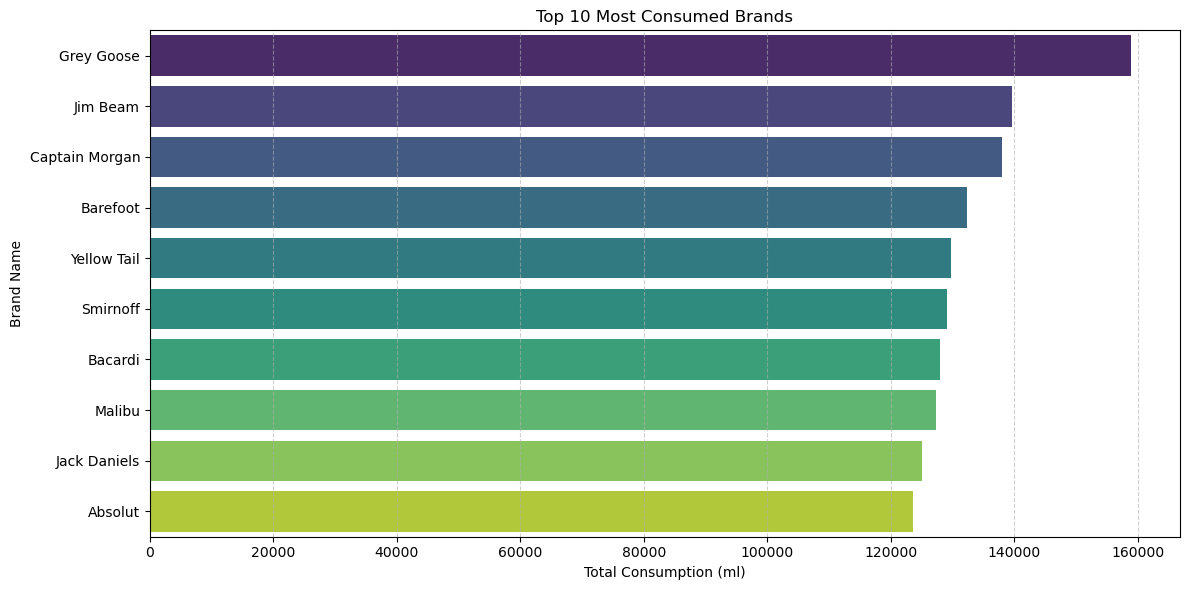

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_consumption.values, y=brand_consumption.index, palette='viridis')
plt.title("Top 10 Most Consumed Brands")
plt.xlabel("Total Consumption (ml)")
plt.ylabel("Brand Name")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [22]:
bar_consumption = (
    df.groupby('Bar Name')['Consumed (ml)']
    .sum()
    .sort_values(ascending=False)
)

print("Total Consumption per Bar:\n")
print(bar_consumption)


Total Consumption per Bar:

Bar Name
Johnson's Bar     344184.38
Anderson's Bar    335818.95
Smith's Bar       328713.91
Brown's Bar       326371.92
Thomas's Bar      318415.94
Taylor's Bar      315176.56
Name: Consumed (ml), dtype: float64


C:\Users\anush\AppData\Local\Temp\ipykernel_6372\2505304005.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


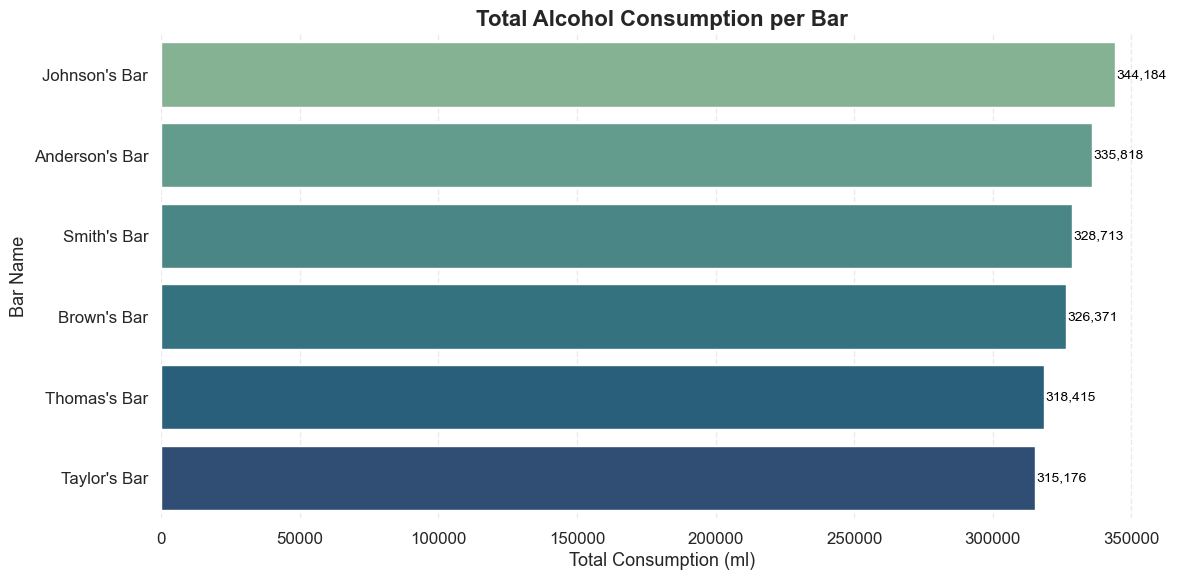

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=bar_consumption.values,
    y=bar_consumption.index,
    palette="crest"  # Use a more neutral/professional palette
)

for i, value in enumerate(bar_consumption.values):
    ax.text(value + 500, i, f'{int(value):,}', va='center', fontsize=10, color='black')

plt.title("Total Alcohol Consumption per Bar", fontsize=16, fontweight='bold')
plt.xlabel("Total Consumption (ml)", fontsize=13)
plt.ylabel("Bar Name", fontsize=13)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()


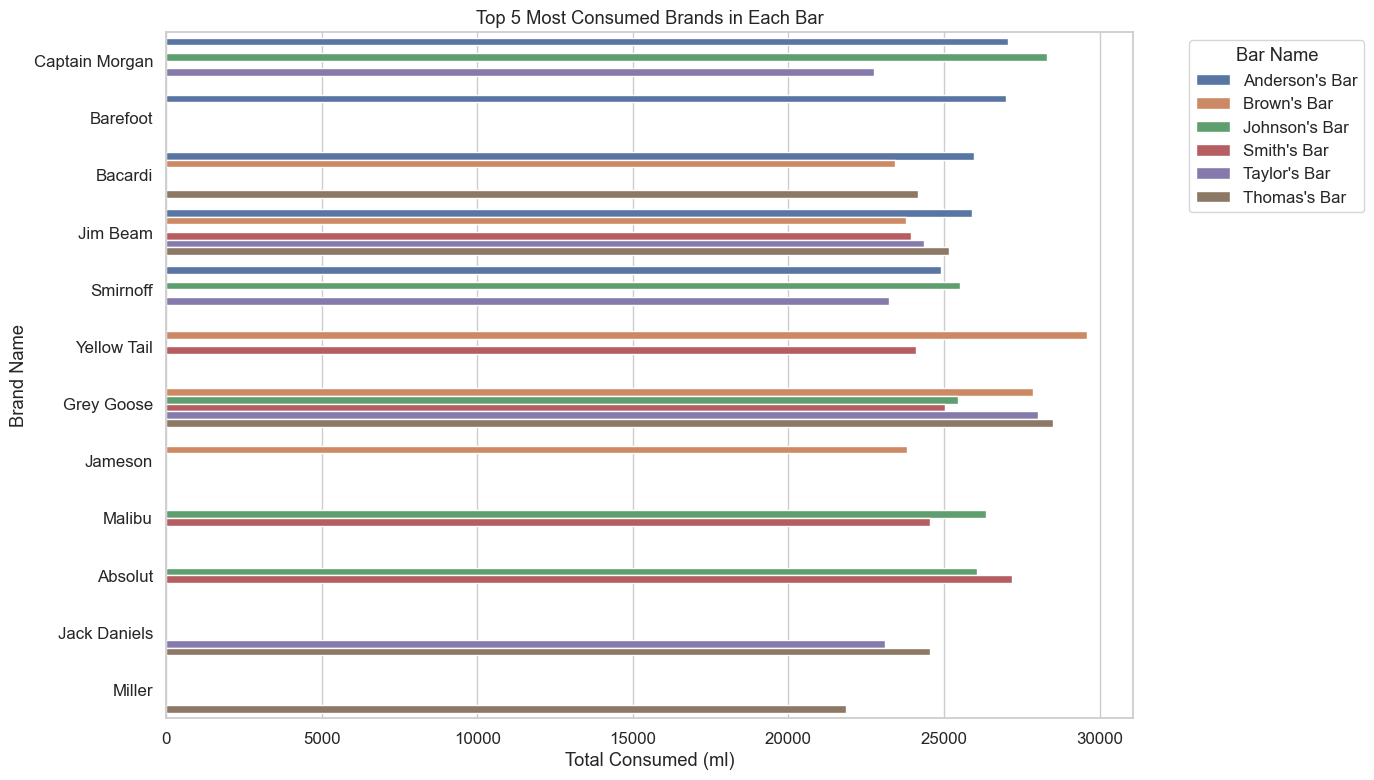

In [26]:
bar_brand_consumption = (
    df.groupby(['Bar Name', 'Brand Name'])['Consumed (ml)']
    .sum()
    .reset_index()
)

top5_brands_per_bar = (
    bar_brand_consumption
    .sort_values(['Bar Name', 'Consumed (ml)'], ascending=[True, False])
    .groupby('Bar Name')
    .head(5)
)

plt.figure(figsize=(14, 8))
sns.barplot(data=top5_brands_per_bar, x='Consumed (ml)', y='Brand Name', hue='Bar Name')
plt.title("Top 5 Most Consumed Brands in Each Bar")
plt.xlabel("Total Consumed (ml)")
plt.ylabel("Brand Name")
plt.legend(title="Bar Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
bar_alcohol = (
    df.groupby(['Bar Name', 'Alcohol Type'])['Consumed (ml)']
    .sum()
    .reset_index()
)

top_alcohol_by_bar = (
    bar_alcohol.loc[bar_alcohol.groupby('Bar Name')['Consumed (ml)'].idxmax()]
    .reset_index(drop=True)
)
print(top_alcohol_by_bar)

         Bar Name Alcohol Type  Consumed (ml)
0  Anderson's Bar      Whiskey       70459.96
1     Brown's Bar         Wine       69469.77
2   Johnson's Bar        Vodka       77030.94
3     Smith's Bar        Vodka       69241.21
4    Taylor's Bar        Vodka       69766.61
5    Thomas's Bar        Vodka       70357.19


In [30]:
bar_brand = (
    df.groupby(['Bar Name', 'Brand Name'])['Consumed (ml)']
    .sum()
    .reset_index()
)
top_brand_by_bar = (
    bar_brand.loc[bar_brand.groupby('Bar Name')['Consumed (ml)'].idxmax()]
    .reset_index(drop=True)
)
print(top_brand_by_bar)

         Bar Name      Brand Name  Consumed (ml)
0  Anderson's Bar  Captain Morgan       27066.83
1     Brown's Bar     Yellow Tail       29588.63
2   Johnson's Bar  Captain Morgan       28319.66
3     Smith's Bar         Absolut       27181.45
4    Taylor's Bar      Grey Goose       28017.89
5    Thomas's Bar      Grey Goose       28510.30


In [32]:
bar_brand = (
    df.groupby(['Bar Name', 'Brand Name'])['Consumed (ml)']
    .sum()
    .reset_index()
)
least_brand_by_bar = (
    bar_brand.loc[bar_brand.groupby('Bar Name')['Consumed (ml)'].idxmin()]
    .reset_index(drop=True)
)
print(least_brand_by_bar)

         Bar Name Brand Name  Consumed (ml)
0  Anderson's Bar  Budweiser       10062.29
1     Brown's Bar      Coors       14029.01
2   Johnson's Bar     Miller       16325.26
3     Smith's Bar  Budweiser       13615.46
4    Taylor's Bar   Heineken       10108.67
5    Thomas's Bar      Coors       13196.20


In [34]:

df['Usage Ratio'] = df.apply(
    lambda x: x['Consumed (ml)'] / x['Closing Balance (ml)']
    if x['Closing Balance (ml)'] > 0 else None,
    axis=1
)
brand_usage_ratio = (
    df.groupby(['Bar Name', 'Brand Name'])['Usage Ratio']
    .mean()
    .reset_index()
    .sort_values(by='Usage Ratio', ascending=False)
)

print("Average Usage Ratio (Consumed / Closing Balance) per Brand per Bar:\n")
print(brand_usage_ratio)


Average Usage Ratio (Consumed / Closing Balance) per Brand per Bar:

          Bar Name   Brand Name   Usage Ratio
79    Taylor's Bar  Yellow Tail  2.533311e+14
64    Taylor's Bar      Absolut  1.669400e+14
53     Smith's Bar        Coors  1.630752e+14
27     Brown's Bar       Malibu  1.535782e+14
49     Smith's Bar      Bacardi  1.436186e+14
..             ...          ...           ...
34   Johnson's Bar     Barefoot  6.512744e-02
2   Anderson's Bar     Barefoot  6.500114e-02
14  Anderson's Bar  Sutter Home  6.404848e-02
66    Taylor's Bar     Barefoot  5.838628e-02
63     Smith's Bar  Yellow Tail  5.113777e-02

[96 rows x 3 columns]


In [35]:

cleaned_ratio = brand_usage_ratio.dropna()
cleaned_ratio = cleaned_ratio[cleaned_ratio['Usage Ratio'] < 10]  # logical upper bound
cleaned_ratio['Usage Ratio'] = cleaned_ratio['Usage Ratio'].round(2)

print("Top 10 Highest Usage Ratios (Fastest Moving Brands):\n")
print(cleaned_ratio.sort_values(by='Usage Ratio', ascending=False).head(10))

print("\nTop 10 Lowest Usage Ratios (Slowest Moving Brands):\n")
print(cleaned_ratio.sort_values(by='Usage Ratio', ascending=True).head(10))


Top 10 Highest Usage Ratios (Fastest Moving Brands):

          Bar Name      Brand Name  Usage Ratio
83    Thomas's Bar       Budweiser         1.22
3   Anderson's Bar       Budweiser         1.09
90    Thomas's Bar        Jim Beam         0.73
78    Taylor's Bar     Sutter Home         0.61
75    Taylor's Bar          Malibu         0.55
67    Taylor's Bar       Budweiser         0.52
21     Brown's Bar           Coors         0.49
95    Thomas's Bar     Yellow Tail         0.47
56     Smith's Bar    Jack Daniels         0.39
68    Taylor's Bar  Captain Morgan         0.36

Top 10 Lowest Usage Ratios (Slowest Moving Brands):

          Bar Name    Brand Name  Usage Ratio
63     Smith's Bar   Yellow Tail         0.05
66    Taylor's Bar      Barefoot         0.06
14  Anderson's Bar   Sutter Home         0.06
2   Anderson's Bar      Barefoot         0.07
34   Johnson's Bar      Barefoot         0.07
46   Johnson's Bar   Sutter Home         0.07
25     Brown's Bar       Jameson         0

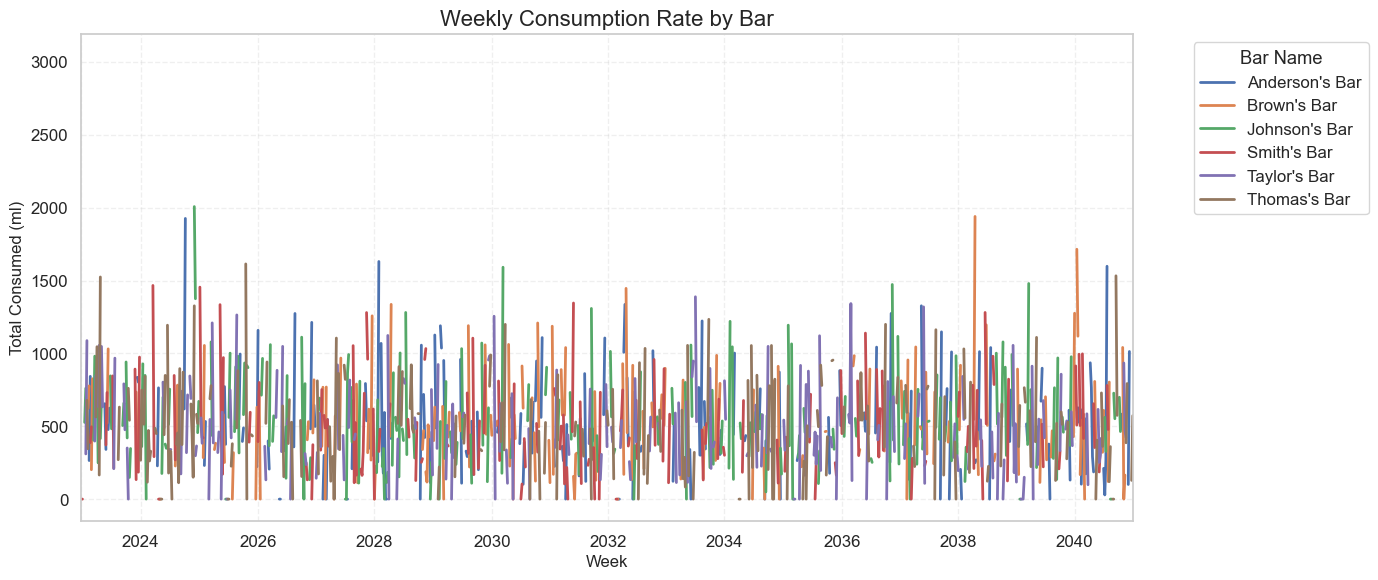

In [38]:

df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_consumption = df.groupby(['Week', 'Bar Name'])['Consumed (ml)'].sum().reset_index()
weekly_pivot = weekly_consumption.pivot(index='Week', columns='Bar Name', values='Consumed (ml)')

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
weekly_pivot.plot(ax=plt.gca(), linewidth=2)

plt.title('Weekly Consumption Rate by Bar', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Consumed (ml)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Bar Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


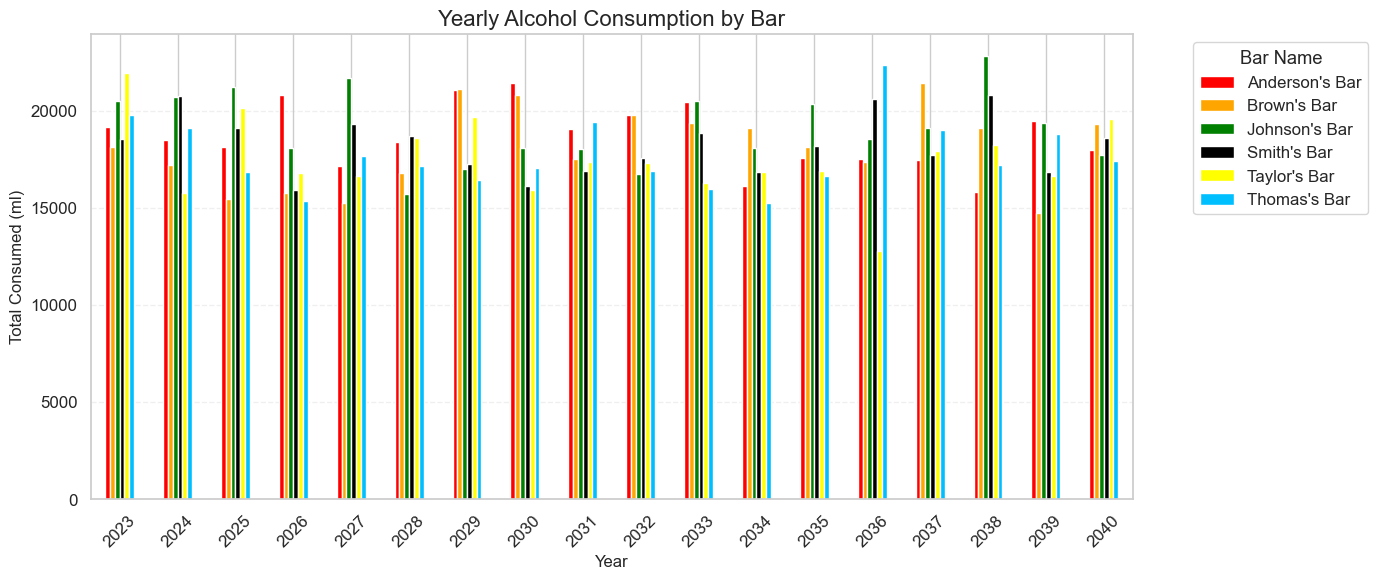

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
yearly_consumption = df.groupby(['Year', 'Bar Name'])['Consumed (ml)'].sum().reset_index()

yearly_pivot = yearly_consumption.pivot(index='Year', columns='Bar Name', values='Consumed (ml)')

custom_colors = ['red', 'orange', 'green', 'black', 'yellow', 'deepskyblue']  # 6 bars
plt.figure(figsize=(14, 6))
yearly_pivot.plot(kind='bar', color=custom_colors, ax=plt.gca())

plt.title('Yearly Alcohol Consumption by Bar', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Consumed (ml)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Bar Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_excel("C:/Users/anush/Downloads/Consumption Dataset.xlsx")

df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Calculate average daily consumption
avg_consumption = (
    df.groupby(['Bar Name', 'Brand Name'])['Consumed (ml)']
    .mean()
    .reset_index()
    .rename(columns={'Consumed (ml)': 'Avg Daily Consumption'})
)

# Step 3: Define Par Level (e.g., 3-day stock)
avg_consumption['Par Level'] = avg_consumption['Avg Daily Consumption'] * 3

# Step 4: Merge par level info back to original
df = df.merge(avg_consumption, on=['Bar Name', 'Brand Name'], how='left')

# Step 5: Flag understocked rows
df['Understocked'] = df['Closing Balance (ml)'] < df['Par Level']

# Step 6: Create understocked_items again
understocked_items = df[df['Understocked']].copy()


In [41]:
import pandas as pd

pd.set_option('display.max_rows', None)

df['Date'] = pd.to_datetime(df['Date'])

avg_consumption = (
    df.groupby(['Bar Name', 'Brand Name'])['Consumed (ml)']
    .mean()
    .reset_index()
    .rename(columns={'Consumed (ml)': 'Avg Daily Consumption'})
)

lead_time = 3
avg_consumption['Par Level'] = avg_consumption['Avg Daily Consumption'] * lead_time

print("\nColumns in avg_consumption:")
print(avg_consumption.columns)

if 'Par Level' in df.columns:
    df = df.drop(columns=['Par Level'])

df = df.merge(
    avg_consumption[['Bar Name', 'Brand Name', 'Par Level']],
    on=['Bar Name', 'Brand Name'],
    how='left'
)

print("\nColumns in merged df:")
print(df.columns)

df['Understocked'] = df['Closing Balance (ml)'] < df['Par Level']

understock_summary = (
    df[df['Understocked']]
    .groupby(['Bar Name', 'Brand Name'])
    .size()
    .reset_index(name='Understocked Days')
    .sort_values(by=['Bar Name', 'Understocked Days'], ascending=[True, False])
)

print("\nUnderstocked Summary:\n")
print(understock_summary)



Columns in avg_consumption:
Index(['Bar Name', 'Brand Name', 'Avg Daily Consumption', 'Par Level'], dtype='object')

Columns in merged df:
Index(['Time', 'Date', 'Bar Name', 'Alcohol Type', 'Brand Name',
       'Opening Balance (ml)', 'Purchase (ml)', 'Consumed (ml)',
       'Closing Balance (ml)', 'Unnamed: 9', 'Unnamed: 10',
       'Avg Daily Consumption', 'Understocked', 'Par Level'],
      dtype='object')

Understocked Summary:

          Bar Name      Brand Name  Understocked Days
12  Anderson's Bar     Yellow Tail                 54
0   Anderson's Bar         Absolut                 41
10  Anderson's Bar          Malibu                 40
7   Anderson's Bar    Jack Daniels                 34
1   Anderson's Bar         Bacardi                 30
6   Anderson's Bar        Heineken                 24
8   Anderson's Bar         Jameson                 24
9   Anderson's Bar        Jim Beam                 24
11  Anderson's Bar          Miller                 24
2   Anderson's Bar    

In [195]:
cleaned_understocked = understocked_items[[
    'Date',
    'Bar Name',
    'Brand Name',
    'Alcohol Type',
    'Avg Daily Consumption',
    'Par Level',
    'Closing Balance (ml)',
    'Understocked'
]].copy()

cleaned_understocked['Avg Daily Consumption'] = cleaned_understocked['Avg Daily Consumption'].round(2)
cleaned_understocked['Par Level'] = cleaned_understocked['Par Level'].round(2)
cleaned_understocked['Closing Balance (ml)'] = cleaned_understocked['Closing Balance (ml)'].round(2)

print(" Understocked Items:\n")
print(cleaned_understocked.head(100))


 Understocked Items:

          Date        Bar Name      Brand Name Alcohol Type  Avg Daily Consumption  Par Level  Closing Balance (ml)  Understocked
6   2023-01-07     Brown's Bar        Jim Beam      Whiskey                 317.03     951.10                826.20          True
13  2023-01-14  Anderson's Bar        Jim Beam      Whiskey                 323.61     970.82                872.08          True
22  2023-01-23   Johnson's Bar     Yellow Tail         Wine                 291.90     875.69                802.97          True
26  2023-01-27     Brown's Bar         Bacardi          Rum                 300.27     900.80                613.68          True
27  2023-01-28     Brown's Bar    Jack Daniels      Whiskey                 224.62     673.87                422.51          True
33  2023-02-03  Anderson's Bar           Coors         Beer                 357.99    1073.96                483.45          True
38  2023-02-08     Smith's Bar       Budweiser         Beer         

In [48]:
top_understocked = (
    understocked_items.groupby(['Bar Name', 'Brand Name'])
    .size()
    .reset_index(name='Understocked Days')
    .sort_values(by='Understocked Days', ascending=False)
)

print(top_understocked.head(5))


          Bar Name    Brand Name  Understocked Days
12  Anderson's Bar   Yellow Tail                 54
25     Brown's Bar      Smirnoff                 54
52    Taylor's Bar       Absolut                 46
50     Smith's Bar      Smirnoff                 45
21     Brown's Bar  Jack Daniels                 44


In [50]:
print(cleaned_understocked.columns.tolist())


['Date', 'Bar Name', 'Brand Name', 'Alcohol Type', 'Avg Daily Consumption', 'Par Level', 'Closing Balance (ml)', 'Understocked']


In [169]:
reorder_plan = cleaned_understocked.copy()
reorder_plan['Reorder Quantity (ml)'] = reorder_plan['Par Level'] - reorder_plan['Closing Balance (ml)']
reorder_plan = reorder_plan[reorder_plan['Reorder Quantity (ml)'] > 0]

# Show the reorder plan
print(reorder_plan[['Date', 'Bar Name', 'Brand Name', 'Reorder Quantity (ml)']])


           Date        Bar Name      Brand Name  Reorder Quantity (ml)
6    2023-01-07     Brown's Bar        Jim Beam                 124.90
13   2023-01-14  Anderson's Bar        Jim Beam                  98.74
22   2023-01-23   Johnson's Bar     Yellow Tail                  72.72
26   2023-01-27     Brown's Bar         Bacardi                 287.12
27   2023-01-28     Brown's Bar    Jack Daniels                 251.36
33   2023-02-03  Anderson's Bar           Coors                 590.51
38   2023-02-08     Smith's Bar       Budweiser                 652.43
42   2023-02-12     Brown's Bar        Jim Beam                 352.63
43   2023-02-13     Brown's Bar         Bacardi                 754.99
45   2023-02-15    Taylor's Bar        Heineken                 359.99
54   2023-02-24    Thomas's Bar        Jim Beam                 378.56
56   2023-02-26     Smith's Bar         Absolut                  18.55
69   2023-03-11  Anderson's Bar           Coors                 125.18
82   2

In [193]:
reorder_plan.to_excel("Reorder_Plan.xlsx", index=False)
print(" Reorder plan exported successfully.")


 Reorder plan exported successfully.


In [171]:
# Loop through understocked items and print reorder alert
understocked_items = df[df['Understocked'] == True]

for index, row in understocked_items.iterrows():
    print(f" Reorder Alert: {row['Brand Name']} is understocked at {row['Bar Name']} on {row['Date'].date()}!")


 Reorder Alert: Jim Beam is understocked at Brown's Bar on 2023-01-07!
 Reorder Alert: Jim Beam is understocked at Anderson's Bar on 2023-01-14!
 Reorder Alert: Yellow Tail is understocked at Johnson's Bar on 2023-01-23!
 Reorder Alert: Bacardi is understocked at Brown's Bar on 2023-01-27!
 Reorder Alert: Jack Daniels is understocked at Brown's Bar on 2023-01-28!
 Reorder Alert: Coors is understocked at Anderson's Bar on 2023-02-03!
 Reorder Alert: Budweiser is understocked at Smith's Bar on 2023-02-08!
 Reorder Alert: Jim Beam is understocked at Brown's Bar on 2023-02-12!
 Reorder Alert: Bacardi is understocked at Brown's Bar on 2023-02-13!
 Reorder Alert: Heineken is understocked at Taylor's Bar on 2023-02-15!
 Reorder Alert: Jim Beam is understocked at Thomas's Bar on 2023-02-24!
 Reorder Alert: Absolut is understocked at Smith's Bar on 2023-02-26!
 Reorder Alert: Coors is understocked at Anderson's Bar on 2023-03-11!
 Reorder Alert: Absolut is understocked at Brown's Bar on 2023-03

In [58]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox

df['Date'] = pd.to_datetime(df['Date'])

avg_consumption = (
    df.groupby(['Bar Name', 'Brand Name'])['Consumed (ml)']
    .mean()
    .reset_index()
    .rename(columns={'Consumed (ml)': 'Avg Daily Consumption (ml)'})
)

lead_time = 3
avg_consumption['Par Level'] = avg_consumption['Avg Daily Consumption (ml)'] * lead_time

if 'Par Level' in df.columns:
    df.drop(columns=['Par Level'], inplace=True)

df = df.merge(
    avg_consumption[['Bar Name', 'Brand Name', 'Par Level']],
    on=['Bar Name', 'Brand Name'],
    how='left'
)

df['Understocked'] = df['Closing Balance (ml)'] < df['Par Level']

under_df = df[df['Understocked']].copy()

root = tk.Tk()
root.withdraw()  # Hides the root window

for bar_name in under_df['Bar Name'].unique():
    bar_alerts = under_df[under_df['Bar Name'] == bar_name]

    message = f" Understock Alerts for {bar_name}\n\n"

    for _, row in bar_alerts.iterrows():
        message += (
            f"• {row['Brand Name']} | Date: {row['Date'].date()} | "
            f"Stock: {row['Closing Balance (ml)']}ml | "
            f"Par: {round(row['Par Level'], 2)}ml\n"
        )
    messagebox.showwarning(f" Inventory Alert: {bar_name}", message)

root.destroy()


In [58]:
reorder_plan.to_excel('reorder_alerts.xlsx', index=False)


In [59]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df['Date'].dt.isocalendar().week

weekly_consumption = df.groupby(['Bar Name', 'Brand Name', 'Week'])['Consumed (ml)'].sum().reset_index()

last_two_weeks = weekly_consumption.groupby(['Bar Name', 'Brand Name']).tail(2)
forecast = last_two_weeks.groupby(['Bar Name', 'Brand Name']).agg({'Consumed (ml)': 'mean'}).reset_index()
forecast = forecast.rename(columns={'Consumed (ml)': 'Predicted Next Week Consumption (ml)'})

forecast['Week'] = weekly_consumption['Week'].max() + 1

forecast.to_excel("weekly_forecast_next_week.xlsx", index=False)




In [191]:
print(forecast[['Bar Name', 'Brand Name', 'Predicted Next Week Consumption (ml)', 'Week']].head(50))

          Bar Name      Brand Name  Predicted Next Week Consumption (ml)  Week
0   Anderson's Bar         Absolut                               200.905    54
1   Anderson's Bar         Bacardi                               543.875    54
2   Anderson's Bar        Barefoot                               183.820    54
3   Anderson's Bar       Budweiser                               631.325    54
4   Anderson's Bar  Captain Morgan                              1200.755    54
5   Anderson's Bar           Coors                               350.405    54
6   Anderson's Bar      Grey Goose                               982.130    54
7   Anderson's Bar        Heineken                               543.420    54
8   Anderson's Bar    Jack Daniels                               549.335    54
9   Anderson's Bar         Jameson                               263.385    54
10  Anderson's Bar        Jim Beam                               921.225    54
11  Anderson's Bar          Malibu                  

In [175]:

avg_daily = df.groupby(['Bar Name', 'Brand Name'])['Avg Daily Consumption'].mean().reset_index()
avg_daily.rename(columns={'Avg Daily Consumption': 'Avg Daily Consumption (ml)'}, inplace=True)

lead_time = 7
avg_daily['Par Level (ml)'] = avg_daily['Avg Daily Consumption (ml)'] * lead_time

df = df.drop(columns=['Avg Daily Consumption (ml)', 'Par Level (ml)'], errors='ignore')  # Avoid duplicate columns
df = df.merge(avg_daily, on=['Bar Name', 'Brand Name'], how='left')

df['Recommended Reorder Qty (ml)'] = (df['Par Level (ml)'] - df['Closing Balance (ml)']).clip(lower=0).round(2)

reorder_plan_forecast = df[df['Recommended Reorder Qty (ml)'] > 0].copy()

reorder_plan_forecast_sorted = reorder_plan_forecast.sort_values(by=['Bar Name', 'Brand Name'])
print(reorder_plan_forecast_sorted[['Bar Name', 'Brand Name', 'Closing Balance (ml)', 'Recommended Reorder Qty (ml)']])

for bar in reorder_plan_forecast['Bar Name'].unique():
    print(f"\nBar: {bar}")
    display(
        reorder_plan_forecast[reorder_plan_forecast['Bar Name'] == bar][[
            'Brand Name', 'Closing Balance (ml)', 'Recommended Reorder Qty (ml)'
        ]].sort_values(by='Brand Name')
    )
with pd.ExcelWriter("Reorder_Report_Barwise.xlsx") as writer:
    for bar in reorder_plan_forecast['Bar Name'].unique():
        bar_df = reorder_plan_forecast[reorder_plan_forecast['Bar Name'] == bar][[
            'Brand Name', 'Closing Balance (ml)', 'Recommended Reorder Qty (ml)'
        ]]
        bar_df.to_excel(writer, sheet_name=bar[:31], index=False)  


            Bar Name      Brand Name  Closing Balance (ml)  Recommended Reorder Qty (ml)
32    Anderson's Bar         Absolut          1.191300e+03                        139.10
90    Anderson's Bar         Absolut          7.281000e+02                        602.30
110   Anderson's Bar         Absolut          2.750800e+02                       1055.32
146   Anderson's Bar         Absolut          1.705303e-13                       1330.40
208   Anderson's Bar         Absolut          1.705303e-13                       1330.40
495   Anderson's Bar         Absolut          1.705303e-13                       1330.40
594   Anderson's Bar         Absolut          1.705303e-13                       1330.40
608   Anderson's Bar         Absolut          1.705303e-13                       1330.40
664   Anderson's Bar         Absolut          1.705303e-13                       1330.40
682   Anderson's Bar         Absolut          1.705303e-13                       1330.40
988   Anderson's Bar 

,Brand Name,Closing Balance (ml),Recommended Reorder Qty (ml)
1319,Absolut,1.401600e+02,2072.28
5010,Absolut,1.962620e+03,249.82
1881,Absolut,0.000000e+00,2212.44
4091,Absolut,1.934280e+03,278.16
522,Absolut,2.248100e+02,1987.63
4121,Absolut,1.622650e+03,589.79
4139,Absolut,1.486210e+03,726.23
1810,Absolut,1.325900e+02,2079.85
564,Absolut,1.489350e+03,723.09
4266,Absolut,1.812910e+03,399.53



📌 Bar: Johnson's Bar


,Brand Name,Closing Balance (ml),Recommended Reorder Qty (ml)
1949,Absolut,5.684342e-14,2225.51
1811,Absolut,5.684342e-14,2225.51
1930,Absolut,5.684342e-14,2225.51
2852,Absolut,1.247880e+03,977.63
1502,Absolut,5.742000e+02,1651.31
489,Absolut,1.567460e+03,658.05
2906,Absolut,8.728000e+02,1352.71
2169,Absolut,9.896000e+02,1235.91
362,Absolut,1.567460e+03,658.05
886,Absolut,1.686160e+03,539.35



📌 Bar: Brown's Bar


,Brand Name,Closing Balance (ml),Recommended Reorder Qty (ml)
305,Absolut,1.848440e+03,293.35
325,Absolut,1.703690e+03,438.10
344,Absolut,1.591620e+03,550.17
3682,Absolut,1.226860e+03,914.93
4493,Absolut,1.470340e+03,671.45
3609,Absolut,0.000000e+00,2141.79
5131,Absolut,8.919300e+02,1249.86
4724,Absolut,0.000000e+00,2141.79
3175,Absolut,0.000000e+00,2141.79
6341,Absolut,2.029730e+03,112.06



📌 Bar: Taylor's Bar


,Brand Name,Closing Balance (ml),Recommended Reorder Qty (ml)
8,Absolut,1.736080e+03,63.12
3739,Absolut,8.787000e+02,920.50
818,Absolut,6.703200e+02,1128.88
799,Absolut,8.526513e-14,1799.20
4026,Absolut,1.504260e+03,294.94
769,Absolut,1.496000e+02,1649.60
4096,Absolut,1.021320e+03,777.88
696,Absolut,6.482700e+02,1150.93
679,Absolut,8.822500e+02,916.95
4165,Absolut,7.238900e+02,1075.31



📌 Bar: Anderson's Bar


,Brand Name,Closing Balance (ml),Recommended Reorder Qty (ml)
1855,Absolut,1.047860e+03,282.54
3918,Absolut,5.684342e-13,1330.40
1170,Absolut,1.151100e+03,179.30
682,Absolut,1.705303e-13,1330.40
6182,Absolut,3.472500e+02,983.15
4084,Absolut,5.684342e-13,1330.40
1221,Absolut,8.613700e+02,469.03
4115,Absolut,5.684342e-13,1330.40
1877,Absolut,7.467700e+02,583.63
5003,Absolut,1.047570e+03,282.83



📌 Bar: Thomas's Bar


,Brand Name,Closing Balance (ml),Recommended Reorder Qty (ml)
1225,Absolut,1.428560e+03,841.33
5325,Absolut,1.364440e+03,905.45
2535,Absolut,1.813290e+03,456.60
5275,Absolut,1.613170e+03,656.72
2570,Absolut,1.679590e+03,590.30
1277,Absolut,1.927420e+03,342.47
5242,Absolut,9.146800e+02,1355.21
5176,Absolut,1.105920e+03,1163.97
5160,Absolut,1.531830e+03,738.06
2646,Absolut,9.869700e+02,1282.92


In [64]:
#overstocking anaysis


In [189]:

overstock_threshold = 1.5

df['Overstocked'] = df['Closing Balance (ml)'] > (df['Par Level (ml)'] * overstock_threshold)

overstocked_items = df[df['Overstocked']].copy()

overstocked_items['Closing Balance (ml)'] = overstocked_items['Closing Balance (ml)'].round(2)
overstocked_items['Par Level (ml)'] = overstocked_items['Par Level (ml)'].round(2)

print("Overstocked Items:\n")
display(
    overstocked_items[[
        'Date', 'Bar Name', 'Brand Name', 'Alcohol Type',
        'Closing Balance (ml)', 'Par Level (ml)'
    ]]
    .sort_values(by=['Date', 'Bar Name'])
    .reset_index(drop=True)
    .head(50) 
)


Overstocked Items:



,Date,Bar Name,Brand Name,Alcohol Type,Closing Balance (ml),Par Level (ml)
0,2023-01-01,Smith's Bar,Captain Morgan,Rum,4379.88,2037.30
1,2023-01-18,Smith's Bar,Sutter Home,Wine,2998.35,1910.38
2,2023-02-22,Thomas's Bar,Sutter Home,Wine,2517.82,1551.61
3,2023-03-07,Brown's Bar,Grey Goose,Vodka,3792.55,2379.43
4,2023-03-16,Smith's Bar,Miller,Beer,3494.22,2149.42
5,2023-03-18,Johnson's Bar,Heineken,Beer,3434.83,2278.02
6,2023-03-25,Brown's Bar,Jack Daniels,Whiskey,2375.92,1572.36
7,2023-04-14,Brown's Bar,Budweiser,Beer,4278.12,2385.21
8,2023-04-19,Anderson's Bar,Sutter Home,Wine,5422.53,2575.97
9,2023-04-29,Smith's Bar,Miller,Beer,3892.25,2149.42


In [72]:
overstock_summary = (
    overstocked_items.groupby(['Bar Name', 'Brand Name'])
    .size()
    .reset_index(name='Overstocked Days')
    .sort_values(by=['Bar Name', 'Overstocked Days'], ascending=[True, False])
)

print(overstock_summary)


          Bar Name      Brand Name  Overstocked Days
2   Anderson's Bar        Barefoot                80
13  Anderson's Bar        Smirnoff                72
4   Anderson's Bar  Captain Morgan                66
14  Anderson's Bar     Sutter Home                62
6   Anderson's Bar      Grey Goose                51
5   Anderson's Bar           Coors                48
10  Anderson's Bar        Jim Beam                46
9   Anderson's Bar         Jameson                43
8   Anderson's Bar    Jack Daniels                40
1   Anderson's Bar         Bacardi                35
7   Anderson's Bar        Heineken                31
12  Anderson's Bar          Miller                26
3   Anderson's Bar       Budweiser                24
0   Anderson's Bar         Absolut                22
15  Anderson's Bar     Yellow Tail                18
11  Anderson's Bar          Malibu                15
31     Brown's Bar     Yellow Tail                82
25     Brown's Bar         Jameson            

In [104]:

df['Date'] = pd.to_datetime(df['Date'])

avg_daily = (
    df.groupby(['Bar Name', 'Brand Name'])['Consumed (ml)']
    .mean()
    .reset_index()
    .rename(columns={'Consumed (ml)': 'Avg Daily Consumption (ml)'})
)

lead_time = 3  # days
avg_daily['Par Level (ml)'] = avg_daily['Avg Daily Consumption (ml)'] * lead_time

df = df.drop(columns=[
    col for col in df.columns
    if col in ['Avg Daily Consumption (ml)', 'Par Level (ml)']
], errors='ignore')

df = df.merge(avg_daily, on=['Bar Name', 'Brand Name'], how='left')

df['Overstocked'] = df['Closing Balance (ml)'] > (1.5 * df['Par Level (ml)'])

df['Overstock Quantity (ml)'] = df['Closing Balance (ml)'] - (1.5 * df['Par Level (ml)'])

overstocked_df = df[df['Overstocked']].copy()

overstocked_df['Closing Balance (ml)'] = overstocked_df['Closing Balance (ml)'].round(2)
overstocked_df['Par Level (ml)'] = overstocked_df['Par Level (ml)'].round(2)
overstocked_df['Overstock Quantity (ml)'] = overstocked_df['Overstock Quantity (ml)'].round(2)

overstocked_df = overstocked_df.sort_values(by=['Bar Name', 'Date'])



In [187]:

pd.set_option('display.max_columns', None)    
pd.set_option('display.expand_frame_repr', False)  
pd.set_option('display.width', 100)           
print("Date-wise Overstocked Quantity Grouped by Bar:\n")
print(overstocked_df[['Date', 'Bar Name', 'Brand Name', 'Alcohol Type',
                      'Closing Balance (ml)', 'Par Level (ml)', 'Overstock Quantity (ml)']].round(2).head(100))


Date-wise Overstocked Quantity Grouped by Bar:

          Date        Bar Name      Brand Name Alcohol Type  Closing Balance (ml)  Par Level (ml)  Overstock Quantity (ml)
11  2023-01-12  Anderson's Bar     Sutter Home         Wine               2017.45         1103.99                   361.47
12  2023-01-13  Anderson's Bar          Miller         Beer               1963.70          973.94                   502.78
32  2023-02-02  Anderson's Bar         Absolut        Vodka               1191.30          570.17                   336.04
49  2023-02-19  Anderson's Bar        Smirnoff        Vodka               2364.82         1022.86                   830.53
50  2023-02-20  Anderson's Bar        Jim Beam      Whiskey               2420.06          970.82                   963.83
51  2023-02-21  Anderson's Bar        Barefoot         Wine               2398.21         1012.11                   880.04
70  2023-03-12  Anderson's Bar     Sutter Home         Wine               3687.18         1

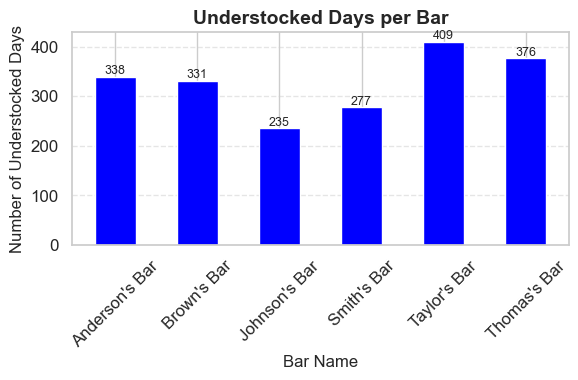

In [165]:
import matplotlib.pyplot as plt
understock_summary = df[df['Understocked']].groupby('Bar Name').size().reset_index(name='Understocked Days')

plt.figure(figsize=(6,4))
bars = plt.bar(
    understock_summary['Bar Name'],
    understock_summary['Understocked Days'],
    color='blue',      
    width=0.5               
)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, int(yval), ha='center', va='bottom', fontsize=9)

plt.title('Understocked Days per Bar', fontsize=14, weight='bold')
plt.xlabel('Bar Name', fontsize=12)
plt.ylabel('Number of Understocked Days', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


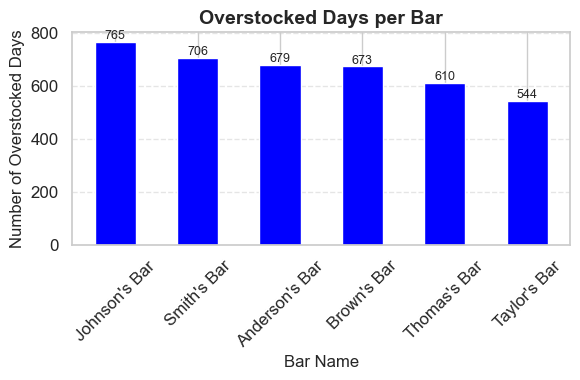

In [163]:
import matplotlib.pyplot as plt
overstock_days_summary = (
    overstocked_df.groupby('Bar Name')['Date']
    .nunique()
    .reset_index()
    .rename(columns={'Date': 'Overstocked Days'})
    .sort_values(by='Overstocked Days', ascending=False)
)

plt.figure(figsize=(6,4))
bars = plt.bar(
    overstock_days_summary['Bar Name'],
    overstock_days_summary['Overstocked Days'],
    color='blue',    
    width=0.5       
)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, int(yval), ha='center', va='bottom', fontsize=9)

plt.title('Overstocked Days per Bar', fontsize=14, weight='bold')
plt.xlabel('Bar Name', fontsize=12)
plt.ylabel('Number of Overstocked Days', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


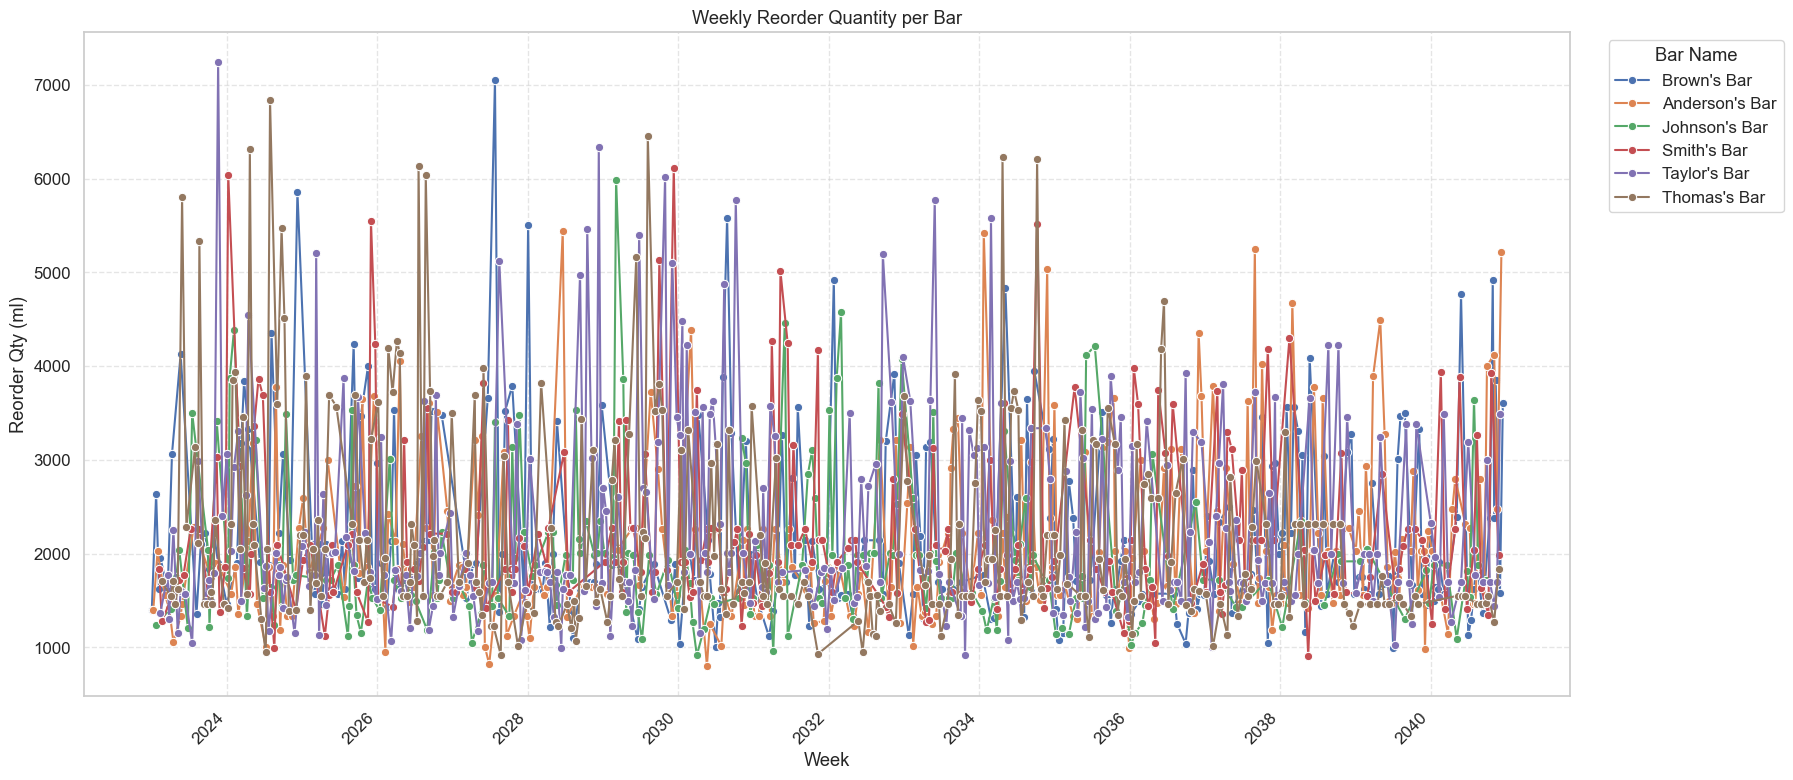

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

weekly_reorder = understocked_df.groupby(['Week', 'Bar Name'])['Reorder Quantity (ml)'].sum().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(data=weekly_reorder, x='Week', y='Reorder Quantity (ml)', hue='Bar Name', marker='o')

plt.title("Weekly Reorder Quantity per Bar")
plt.xlabel("Week")
plt.ylabel("Reorder Qty (ml)")
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Bar Name', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


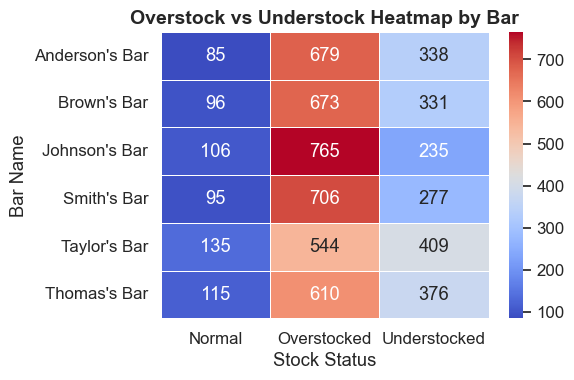

In [159]:

df['Stock Status'] = df.apply(
    lambda row: 'Overstocked' if row['Overstocked']
    else 'Understocked' if row['Understocked']
    else 'Normal', axis=1
)

status_counts = df.groupby(['Bar Name', 'Stock Status']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(status_counts, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Overstock vs Understock Heatmap by Bar', fontsize=14, weight='bold')
plt.xlabel('Stock Status')
plt.ylabel('Bar Name')
plt.tight_layout()
plt.show()


# Alcohol Inventory Optimization - Final Summary

---

### **1. What is the core business problem and why does it matter?**

Hotels and bars often face challenges in maintaining optimal alcohol inventory. Too much stock leads to wastage and high storage costs (especially for perishable or expensive liquor), while too little results in stockouts and missed sales. The goal of this project is to predict consumption trends and optimize reorder decisions to ensure the right inventory levels are maintained — minimizing waste, cutting costs, and improving customer satisfaction.

---

### **2. What assumptions did you make? Why?**

- **Lead time is fixed at 7 days**: Ensures consistent reorder planning.
- **Daily consumption patterns are stable**: Makes average-based forecasting viable.
- **Overstocked = Inventory > 1.5× Par Level**: A practical rule-of-thumb for identifying excess.
- **Understocked = Inventory < Par Level**: Represents risk of running out.
- **Each bar-brand pair behaves independently**: Reflects real-world bar-specific preferences and traffic.

These assumptions were made to keep the solution interpretable and aligned with operational decision-making.

---

### **3. What model did you use and why did you choose it?**

I used a **rule-based statistical approach**:

- Forecast = 7-day average consumption (to set reorder thresholds).
- Reorder recommendation = Par Level - Current Inventory.
- Over/Understock logic = simple threshold rules.

**Why this model?**
- It's explainable and easy to maintain.
- Dataset size is moderate; ML models would risk overfitting.
- Hotels need actionable insights, not complex models.

**Why not ML?**
- No clear seasonal or highly non-linear patterns.
- High interpretability is preferred for bar staff and managers.

---

### **4. How does your system perform? What would you improve?**

**Performance Highlights:**
- Detects overstock and understock situations accurately.
- Provides weekly reorder quantities.
- Clean visualizations using `matplotlib` and `seaborn`.
- Pop-up alerts to notify staff of critical inventory states.

**Improvements for future:**
- Add anomaly handling (e.g. events, holidays).
- Integrate real-time inventory tracking (e.g. via POS).
- Expand to other hotel departments (kitchen, housekeeping).
- Introduce demand-aware reorder logic (e.g. weekend surges).

---

### **5. How would this solution work in a real hotel?**

- Inventory and consumption data are tracked daily via POS/bar logs.
- This script runs weekly (or daily) to:
  - Flag stock issues.
  - Generate reorder suggestions.
  - Push alerts to managers via a dashboard or email.
- The dashboard in Tableau provides bar-wise summaries and trends for procurement teams.

---

### **Optional: What would break at scale? What would you track in production?**

**Scalability Risks:**
- Large number of bars/brands could slow down processing.
- Manual entries could introduce data inconsistencies.

**Monitoring/Tracking Needs:**
- Forecast accuracy vs. actual usage.
- Reorder fulfillment delays.
- % of over/understock events.
- Alert responsiveness by staff.

---

 **Conclusion:**  
This system provides a lightweight, scalable, and interpretable alcohol inventory solution tailored for real-world hospitality settings.


### What Would Break at Scale? What Would You Track in Production?

#### What Could Break at Scale:

- **Data Inconsistency Across Bars:**  
  As the solution scales to more bars or locations, inconsistent data formats, missing columns, or naming mismatches may cause merge failures or incorrect forecasts.

- **Manual Inventory Errors:**  
  Errors in recording consumption or closing balances manually can skew reorder logic and lead to false alerts.

- **Performance Bottlenecks:**  
  With a growing dataset (millions of rows across locations), pandas operations may slow down. The current solution is not optimized for parallel processing or real-time streaming.

- **Generic Threshold Logic:**  
  A fixed 1.5x threshold for overstock and 1x par level for understock may not be optimal for all alcohol types (e.g., rare wines, slow movers).

- **Static Assumptions May Fail:**  
  Assuming fixed 7-day lead time and steady consumption may break during special events, holidays, or unexpected surges in demand.

---

#### What to Track in Production:

- **Forecast Accuracy Metrics:**  
  Monitor actual vs. forecasted consumption using error metrics like MAPE or RMSE.

- **Alert Response Times:**  
  Measure how quickly bar managers respond to reorder alerts and take action.

- **Order Fulfillment Lag:**  
  Track the delay between reorder alerts and stock actually being replenished.

- **Inventory Turnover Rates:**  
  Evaluate how quickly stock is being consumed and replaced to fine-tune par levels.

- **Error & Exception Logs:**  
  Log failed operations, missing values, and suspicious data points (e.g., unusually high/low consumption).

- **System Health & Execution:**  
  Track scheduled runs, script failures, export success rates, and dashboard access frequency.

---

